<a href="https://colab.research.google.com/github/KalyaniAvhale/ML-Competition/blob/main/HackerEarth/Predict%20the%20churn%20risk%20rate/Churn_Risk_prediction_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import Required libraries

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

###Load the datset

In [2]:
#read csv file

train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Customer_churn_pred/train.csv") #read train file
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Customer_churn_pred/test.csv') #read test file

#shape of train data and test data

print("Shape of Train dataset : ",train_data.shape)

print("Shape of Test dataset : ",test_data.shape)

Shape of Train dataset :  (36992, 25)
Shape of Test dataset :  (19919, 24)


### Understand the data and decide the task to perform

In [3]:
train_data.head(3)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5


<html><b> 

customer_id , Name , security_no ,referral_id this are the unique columns and wont be useful in predictions , so we wont be selecting this to feature set for training the model

</b></html>

In [4]:
train_data.info()
print("_"*50)
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l


<html><b> 

Here we can observe that few columns such as joining_date must be datetime type rather than object
similarly last_visit_time must not be an object

We will explore each feature values

</b></html>

###check for null or missing values if any



In [5]:
#Percentage of NAN Values 
NAN_trainData = [(col, train_data[col].isna().mean()*100) for col in train_data]
NAN_trainData = pd.DataFrame(NAN_trainData, columns=["column_name", "percentage"])

#features with null values
NAN_trainData = NAN_trainData[NAN_trainData.percentage !=0]
NAN_trainData.sort_values("percentage", ascending=False)


,column_name,percentage
5,region_category,14.673443
18,points_in_wallet,9.307418
10,preferred_offer_types,0.778547


In [6]:
#Percentage of NAN Values 
NAN_testData = [(col, test_data[col].isna().mean()*100) for col in test_data]
NAN_testData = pd.DataFrame(NAN_testData, columns=["column_name", "percentage"])

#features with null values
NAN_testData = NAN_testData[NAN_testData.percentage !=0]
NAN_testData.sort_values("percentage", ascending=False)


,column_name,percentage
5,region_category,14.799940
18,points_in_wallet,9.854912
10,preferred_offer_types,0.798233


### Cleaning / Pre-processing

Will perform each feature analysis

####Check for unique values for each colummns

In [7]:
#keep copy of data
train_copy = train_data.copy()
test_copy = test_data.copy()

In [8]:
unique_values_trainData = [(col , train_data[col].unique(),len(train_data[col].unique())) for col in train_data]
unique_values_trainData = pd.DataFrame(unique_values_trainData, columns=["column_name", "Unique Values","Count of Unique values"])
unique_values_trainData.sort_values(by=['Count of Unique values'])

,column_name,Unique Values,Count of Unique values
21,past_complaint,"[No, Yes]",2
20,offer_application_preference,"[Yes, No]",2
19,used_special_discount,"[Yes, No]",2
12,internet_option,"[Wi-Fi, Mobile_Data, Fiber_Optic]",3
3,gender,"[F, M, Unknown]",3
8,joined_through_referral,"[No, ?, Yes]",3
5,region_category,"[Village, City, Town, nan]",4
11,medium_of_operation,"[?, Desktop, Smartphone, Both]",4
10,preferred_offer_types,"[Gift Vouchers/Coupons, Credit/Debit Card Offe...",4
22,complaint_status,"[Not Applicable, Solved, Solved in Follow-up, ...",5


In [9]:
unique_values_testData = [(col , test_data[col].unique(),len(test_data[col].unique())) for col in test_data]
unique_values_testData = pd.DataFrame(unique_values_testData, columns=["column_name", "Unique Values","Count of Unique values"])
unique_values_testData.sort_values(by=['Count of Unique values'])

,column_name,Unique Values,Count of Unique values
21,past_complaint,"[No, Yes]",2
20,offer_application_preference,"[No, Yes]",2
19,used_special_discount,"[Yes, No]",2
3,gender,"[F, M, Unknown]",3
12,internet_option,"[Wi-Fi, Fiber_Optic, Mobile_Data]",3
8,joined_through_referral,"[No, Yes, ?]",3
11,medium_of_operation,"[Smartphone, Desktop, Both, ?]",4
5,region_category,"[Village, Town, City, nan]",4
10,preferred_offer_types,"[Without Offers, Gift Vouchers/Coupons, Credit...",4
22,complaint_status,"[Not Applicable, Solved in Follow-up, No Infor...",5


<html><b>Here we have feature values that has '?' , nan , -999 , -1 ,etc.. this are the values that might have went missing during datacollection process or has been assigned wrong values instead.
So lets clean this values and do some preprocessing task <b></html>

####Feature : joined_through_referral

In [10]:
print("Train :\n",train_data['joined_through_referral'].value_counts())

print("__"*40)

print("Test :\n",test_data['joined_through_referral'].value_counts())


Train :
 No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64
________________________________________________________________________________
Test :
 Yes    8617
No     8304
?      2998
Name: joined_through_referral, dtype: int64


We have other feature referral_id which has unique referral_id for each customer that has joined through referral.
Lets analysis this feature 

In [11]:
train_data['referral_id'].isnull().sum() , test_data['referral_id'].isnull().sum()

(0, 0)

In [12]:
print(train_data['referral_id'].unique() ,"\n", test_data['referral_id'].unique() )

print("__"*40) 

print("\n\n",train_data['referral_id'].value_counts())

print("__"*40)

print("\n\n",test_data['referral_id'].value_counts())

['xxxxxxxx' 'CID21329' 'CID12313' ... 'CID60808' 'CID10431' 'CID45477'] 
 ['xxxxxxxx' 'CID8941' 'CID5690' ... 'CID45490' 'CID37167' 'CID56352']
________________________________________________________________________________


 xxxxxxxx    17846
CID43705       12
CID3979        11
CID49601       10
CID15792        9
            ...  
CID20460        1
CID25663        1
CID58831        1
CID30255        1
CID30132        1
Name: referral_id, Length: 11359, dtype: int64
________________________________________________________________________________


 xxxxxxxx    9454
CID53991       6
CID13303       6
CID56534       6
CID32760       6
            ... 
CID14221       1
CID2936        1
CID7381        1
CID34567       1
CID53050       1
Name: referral_id, Length: 7603, dtype: int64


In [13]:
train_data[['joined_through_referral','referral_id']]

,joined_through_referral,referral_id
0,No,xxxxxxxx
1,?,CID21329
2,Yes,CID12313
3,Yes,CID3793
4,No,xxxxxxxx
...,...,...
36987,No,xxxxxxxx
36988,No,xxxxxxxx
36989,Yes,CID3838
36990,No,xxxxxxxx


In [14]:
test_data[['joined_through_referral','referral_id']]

,joined_through_referral,referral_id
0,No,xxxxxxxx
1,No,xxxxxxxx
2,No,xxxxxxxx
3,Yes,CID8941
4,Yes,CID5690
...,...,...
19914,No,xxxxxxxx
19915,Yes,CID45490
19916,No,xxxxxxxx
19917,Yes,CID37167


In [15]:
train_data[(train_data['joined_through_referral']=='Yes')][['joined_through_referral','referral_id']]

,joined_through_referral,referral_id
2,Yes,CID12313
3,Yes,CID3793
6,Yes,CID24708
10,Yes,CID19275
13,Yes,CID10856
...,...,...
36978,Yes,CID57663
36981,Yes,CID50041
36983,Yes,CID45477
36986,Yes,CID15800


In [16]:
train_data[(train_data['joined_through_referral']=='No')][['joined_through_referral','referral_id']]

,joined_through_referral,referral_id
0,No,xxxxxxxx
4,No,xxxxxxxx
5,No,xxxxxxxx
8,No,xxxxxxxx
9,No,xxxxxxxx
...,...,...
36985,No,xxxxxxxx
36987,No,xxxxxxxx
36988,No,xxxxxxxx
36990,No,xxxxxxxx


In [17]:
train_data[(train_data['joined_through_referral']=='Yes') & train_data['referral_id']=='xxxxxxxx']

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score


Thus from above analysis we can say that user that did not join through referral has referral_id feature value as 'xxxxxxxx' value with corresponding value as 'No' in joined_through_referral feature.

Lets fill missing values for joined_through_referral feature

In [18]:
train_data['joined_through_referral'] = train_data['referral_id'].apply(lambda x : 'No' if x == 'xxxxxxxx' else 'Yes')
test_data['joined_through_referral'] = test_data['referral_id'].apply(lambda x : 'No' if x == 'xxxxxxxx' else 'Yes')

train_data['joined_through_referral'].isnull().sum() , test_data['joined_through_referral'].isnull().sum()

(0, 0)

####Feature : medium_of_operation

In [19]:
print(train_data['medium_of_operation'].value_counts())
print("- -"*20)
print(test_data['medium_of_operation'].value_counts())

Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Desktop       7463
Smartphone    7405
?             2964
Both          2087
Name: medium_of_operation, dtype: int64


Can replace ? with mode but that can skew the distribution .
We can fill ? as other category(that can be Laptop,Tablets,etc used to login website)

In [20]:
temp_train = train_data.copy()
temp_test = test_data.copy()

In [21]:
#before
counts = temp_train['medium_of_operation'].value_counts()
counts

Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64

In [22]:
train_data['medium_of_operation'] = train_data['medium_of_operation'].replace('?',np.nan)
test_data['medium_of_operation'] = test_data['medium_of_operation'].replace('?',np.nan)



Imputation in later steps

####Feature :region category

In [23]:
train_data['region_category'].isnull().sum()

5428

In [24]:
train_data['region_category'].value_counts()

Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64

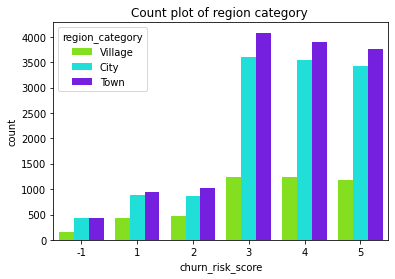

In [25]:
sns.countplot(x = 'churn_risk_score' , palette= 'hsv', data=train_data,hue='region_category') ;
plt.title("Count plot of region category ");

We can see that we have more customers from town / City compared to village .
We will impute null values in later steps

#### Feature : days_since_last_login

In [26]:
days=train_data['days_since_last_login'].unique()
days.sort()
print(days)

print("- -"*40)

days=test_data['days_since_last_login'].unique()
days.sort()
print(days)

[-999    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26]
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
[-999    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26]


In [27]:
train_data[(train_data['days_since_last_login']==26) & (train_data['churn_risk_score']<3)]   #we can see that more number of days the customer has last login impacts churn risk score

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
2363,fffe43004900440033003000370031003900,Earlie Flick,19,F,FJO2EC4,City,Platinum Membership,2017-06-09,No,xxxxxxxx,Gift Vouchers/Coupons,Both,Wi-Fi,23:40:33,26,487.560000,89921.83,11.0,827.950000,Yes,No,Yes,Solved in Follow-up,Products always in Stock,-1
6787,fffe43004900440033003800380036003400,Bryon Shoaf,14,F,FL0DLRD,City,Silver Membership,2017-05-15,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,21:16:46,26,1388.223474,23984.31,3.0,712.960000,Yes,No,No,Not Applicable,Reasonable Price,-1
14404,fffe43004900440032003200310031003000,Ardella Abel,47,F,EJUVQJZ,City,Platinum Membership,2016-12-09,Yes,CID58833,Gift Vouchers/Coupons,Smartphone,Mobile_Data,13:17:55,26,65.590000,29549.00,Error,1131.953931,Yes,No,No,Not Applicable,Too many ads,-1
15593,fffe43004900440035003400350035003100,Marlena Villicana,45,M,YWK74OD,Village,Gold Membership,2017-02-16,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,20:30:54,26,-1006.401483,9532.45,29.530489802652568,725.950000,Yes,No,Yes,No Information Available,Reasonable Price,2
20114,fffe43004900440032003700340034003700,Elna Boan,21,M,4O9ANZI,City,Premium Membership,2016-12-17,Yes,CID58933,Gift Vouchers/Coupons,Smartphone,Mobile_Data,07:24:36,26,64.870000,99593.56,15.0,NaN,Yes,No,No,Not Applicable,User Friendly Website,2
21055,fffe43004900440034003800350039003400,Evelina Alverson,22,M,5DAWJ5S,City,Premium Membership,2015-03-11,No,xxxxxxxx,Without Offers,Smartphone,Mobile_Data,08:40:28,26,-1002.060971,21957.44,6.0,NaN,Yes,No,No,Not Applicable,Quality Customer Care,2
28785,fffe43004900440031003400350034003700,Marylee Heyen,35,M,SXJNAZP,City,Gold Membership,2015-08-26,No,xxxxxxxx,Without Offers,Smartphone,Wi-Fi,03:31:40,26,34.080000,1489.71,47.4568360737686,1026.923714,No,Yes,Yes,Solved,No reason specified,-1
31514,fffe43004900440031003300310034003100,Silvana Fludd,10,F,D5PDU19,Town,Silver Membership,2015-07-31,No,xxxxxxxx,Gift Vouchers/Coupons,Smartphone,Wi-Fi,00:41:20,26,379.360000,81541.93,2.0,712.580000,Yes,Yes,Yes,Solved in Follow-up,User Friendly Website,2
34022,fffe43004900440033003500360039003800,Maricela Norling,48,F,IPQYE04,NaN,Platinum Membership,2017-06-17,No,xxxxxxxx,Without Offers,Desktop,Wi-Fi,14:04:20,26,82.050000,97518.17,Error,824.250000,No,Yes,Yes,No Information Available,Products always in Stock,1


We will replace -999 to nan and we will impute NaN values in later steps

In [28]:
train_data['days_since_last_login'] = train_data['days_since_last_login'].replace(-999,np.nan)
test_data['days_since_last_login'] = test_data['days_since_last_login'].replace(-999,np.nan)

days=train_data['days_since_last_login'].unique()
days.sort()
print(days)

print("- -"*40)

days=test_data['days_since_last_login'].unique()
days.sort()
print(days)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. nan]
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. nan]


In [29]:
train_data['days_since_last_login'].isnull().sum()

1999

#### Feature : avg_frequency_login_days

In [30]:
train_data['avg_frequency_login_days'].unique()

array(['17.0', '10.0', '22.0', ..., '-9.32551114210603',
       '-8.759329712785977', '27.8399274405269'], dtype=object)

convert column to numeric

We have 'Error' string at some places ..we will replace that with 0 

In [31]:
train_data[train_data['avg_frequency_login_days']=='Error']

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
39,fffe43004900440034003100390036003500,Desire Rieder,49,F,M9F3TE2,Village,Platinum Membership,2017-06-09,Yes,CID18445,Credit/Debit Card Offers,Both,Fiber_Optic,23:11:17,8.0,706.36,19062.25,Error,780.580000,Yes,No,No,Not Applicable,Poor Product Quality,3
44,fffe4300490044003900300031003500,Pam Seigler,36,M,C7QZITU,Village,Silver Membership,2016-11-28,Yes,CID33962,Gift Vouchers/Coupons,NaN,Mobile_Data,06:06:05,2.0,691.09,17989.46,Error,NaN,No,Yes,Yes,Solved,No reason specified,4
45,fffe43004900440033003000360031003100,Lore Yarber,12,M,B1XF70C,City,Premium Membership,2017-02-13,No,xxxxxxxx,Without Offers,Desktop,Mobile_Data,22:27:40,8.0,33.09,55607.35,Error,NaN,Yes,No,No,Not Applicable,User Friendly Website,1
48,fffe43004900440032003800320037003300,Glendora Borel,30,M,TER02YR,City,Platinum Membership,2015-12-11,Yes,CID4129,Gift Vouchers/Coupons,Smartphone,Wi-Fi,14:13:01,20.0,100.42,86433.91,Error,719.930000,No,Yes,Yes,Unsolved,Reasonable Price,2
50,fffe43004900440031003700370031003300,Luisa Allinder,23,M,UAAYTIM,Village,Gold Membership,2015-10-22,Yes,CID24995,Without Offers,NaN,Wi-Fi,14:01:02,10.0,65.25,5136.08,Error,755.220000,No,Yes,No,Not Applicable,Poor Customer Service,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36960,fffe43004900440031003800370034003500,Palma Dunker,40,F,5AQ78IZ,Town,Basic Membership,2017-11-20,No,xxxxxxxx,Without Offers,NaN,Wi-Fi,02:35:26,25.0,96.33,16361.98,Error,954.137008,No,Yes,No,Not Applicable,Too many ads,4
36962,fffe43004900440032003700320032003500,Zoe Andrzejewski,26,M,4318ETP,City,Gold Membership,2017-02-08,No,xxxxxxxx,Without Offers,NaN,Wi-Fi,21:34:15,19.0,202.95,10356.88,Error,693.380000,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,4
36971,fffe43004900440033003900370033003000,Rasheeda Ramsdell,42,F,OYJ0W89,Town,Premium Membership,2015-02-04,Yes,CID54811,Credit/Debit Card Offers,Desktop,Fiber_Optic,13:08:11,16.0,34.10,39439.10,Error,1224.393346,Yes,No,Yes,Solved in Follow-up,Too many ads,3
36989,fffe4300490044003500330034003100,Luciana Kinch,23,F,XK1IM9H,NaN,Basic Membership,2016-09-11,Yes,CID3838,Gift Vouchers/Coupons,Desktop,Wi-Fi,03:50:25,12.0,154.94,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4


In [32]:
train_data['avg_frequency_login_days']= train_data['avg_frequency_login_days'].replace('Error',0)
test_data['avg_frequency_login_days'] = test_data['avg_frequency_login_days'].replace('Error',0)

train_data['avg_frequency_login_days']= pd.to_numeric(train_data['avg_frequency_login_days'])
test_data['avg_frequency_login_days'] = pd.to_numeric(test_data['avg_frequency_login_days'])

print(train_data['avg_frequency_login_days'].dtypes)

float64


In [33]:
train_data['avg_frequency_login_days'].describe()

count    36992.000000
mean        14.455576
std          9.941579
min        -43.652702
25%          7.000000
50%         14.000000
75%         22.000000
max         73.061995
Name: avg_frequency_login_days, dtype: float64

#### Feature : Points in wallet

In [34]:
train_data.points_in_wallet.isnull().sum()

3443

We will impute missing vale in later steps

####Feature : joining_date

In [35]:
train_data['joining_date'] = pd.to_datetime(train_data['joining_date'], format='%Y-%m-%d')
pd.DatetimeIndex(train_data['joining_date']).year.value_counts()

2017    12540
2015    12297
2016    12155
Name: joining_date, dtype: int64

In [36]:
test_data['joining_date'] = pd.to_datetime(test_data['joining_date'], format='%Y-%m-%d')
pd.DatetimeIndex(test_data['joining_date']).year.value_counts()

2015    6659
2017    6639
2016    6621
Name: joining_date, dtype: int64

We have customer data that joined in 2015,2016,2017 year
We will derive new feature 'days_since_joined' 

In [37]:
train_data['days_since_joined'] = train_data['joining_date'].apply(lambda x:(pd.Timestamp('today') - x).days)
test_data['days_since_joined'] = test_data['joining_date'].apply(lambda x:(pd.Timestamp('today') - x).days)
train_data[['joining_date','days_since_joined']].head()

,joining_date,days_since_joined
0,2017-08-17,1334
1,2017-08-28,1323
2,2016-11-11,1613
3,2016-10-29,1626
4,2017-09-12,1308


#### Feature : Past_complaint , complaint status and feedback

feedback /complaints play imp role in customer churn risk
Lets explore on this features

In [38]:
train_data[['past_complaint','complaint_status','feedback']]

,past_complaint,complaint_status,feedback
0,No,Not Applicable,Products always in Stock
1,Yes,Solved,Quality Customer Care
2,Yes,Solved in Follow-up,Poor Website
3,Yes,Unsolved,Poor Website
4,Yes,Solved,Poor Website
...,...,...,...
36987,Yes,No Information Available,No reason specified
36988,No,Not Applicable,Poor Customer Service
36989,Yes,Unsolved,Poor Website
36990,No,Not Applicable,No reason specified


In [39]:
train_data['feedback'].unique()

array(['Products always in Stock', 'Quality Customer Care',
       'Poor Website', 'No reason specified', 'Poor Product Quality',
       'Poor Customer Service', 'Too many ads', 'User Friendly Website',
       'Reasonable Price'], dtype=object)

In [40]:
train_data[(train_data['past_complaint']=='No')][['past_complaint','complaint_status','feedback']]

,past_complaint,complaint_status,feedback
0,No,Not Applicable,Products always in Stock
10,No,Not Applicable,Poor Product Quality
11,No,Not Applicable,Too many ads
13,No,Not Applicable,Poor Product Quality
14,No,Not Applicable,Poor Website
...,...,...,...
36984,No,Not Applicable,Products always in Stock
36986,No,Not Applicable,No reason specified
36988,No,Not Applicable,Poor Customer Service
36990,No,Not Applicable,No reason specified


Though we did not receive complaints we have negative/poor feedback from customers

In [41]:
train_data[(train_data['past_complaint']=='Yes') & (train_data['complaint_status']=='No Information Available')][['past_complaint','complaint_status','feedback']]

,past_complaint,complaint_status,feedback
9,Yes,No Information Available,Poor Customer Service
18,Yes,No Information Available,No reason specified
21,Yes,No Information Available,Poor Website
22,Yes,No Information Available,User Friendly Website
28,Yes,No Information Available,No reason specified
...,...,...,...
36957,Yes,No Information Available,Poor Product Quality
36961,Yes,No Information Available,Poor Customer Service
36964,Yes,No Information Available,Poor Website
36965,Yes,No Information Available,No reason specified


In [42]:
train_data[(train_data['past_complaint']=='Yes')][['past_complaint','complaint_status','feedback']]

,past_complaint,complaint_status,feedback
1,Yes,Solved,Quality Customer Care
2,Yes,Solved in Follow-up,Poor Website
3,Yes,Unsolved,Poor Website
4,Yes,Solved,Poor Website
5,Yes,Unsolved,No reason specified
...,...,...,...
36980,Yes,Solved,Reasonable Price
36981,Yes,Solved,Poor Website
36985,Yes,Unsolved,Products always in Stock
36987,Yes,No Information Available,No reason specified


#### Feature : Target Variable - churn_risk_score

As seen we have 6 classes , we assume -1 to be 1 (sign error)
So we will replace -1 as 1

In [43]:
train_data['churn_risk_score']=train_data['churn_risk_score'].replace(-1,1)
train_data['churn_risk_score'].unique()

array([2, 1, 5, 3, 4])

In [94]:
train_data['churn_risk_score'].value_counts()

3    10424
4    10185
5     9827
1     3815
2     2741
Name: churn_risk_score, dtype: int64

## Handle Missing/Null values

After preprocessing we have introduced few more null values 
Lets impute this values

In [44]:
#train_data
#Percentage of NAN Values 
NAN_trainData = [(col, train_data[col].isna().mean()*100) for col in train_data]
NAN_trainData = pd.DataFrame(NAN_trainData, columns=["column_name", "percentage"])

#features with null values
NAN_trainData = NAN_trainData[NAN_trainData.percentage !=0]
NAN_trainData.sort_values("percentage", ascending=False)

,column_name,percentage
5,region_category,14.673443
11,medium_of_operation,14.578828
18,points_in_wallet,9.307418
14,days_since_last_login,5.403871
10,preferred_offer_types,0.778547


In [45]:
#test_data
#Percentage of NAN Values 
NAN_testData = [(col, test_data[col].isna().mean()*100) for col in test_data]
NAN_testData = pd.DataFrame(NAN_testData, columns=["column_name", "percentage"])

#features with null values
NAN_testData = NAN_testData[NAN_testData.percentage !=0]
NAN_testData.sort_values("percentage", ascending=False)

,column_name,percentage
11,medium_of_operation,14.880265
5,region_category,14.799940
18,points_in_wallet,9.854912
14,days_since_last_login,5.130780
10,preferred_offer_types,0.798233


In [46]:
train_data.head(10)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,days_since_joined
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,NaN,Wi-Fi,16:08:02,17.0,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2,1334
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,Yes,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16.0,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1,1323
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14.0,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5,1613
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11.0,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5,1626
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20.0,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5,1308
5,fffe43004900440036003300320035003300,Leslie Browder,13,M,PSG1LGF,City,Gold Membership,2016-01-08,No,xxxxxxxx,Gift Vouchers/Coupons,NaN,Wi-Fi,06:46:07,23.0,433.62,13884.77,24.0,722.27,Yes,No,Yes,Unsolved,No reason specified,3,1921
6,fffe43004900440031003100360037003900,Bridget Balog,21,M,R3CX1EA,Town,Gold Membership,2015-03-19,Yes,CID24708,Gift Vouchers/Coupons,Desktop,Mobile_Data,11:40:04,10.0,55.38,8982.50,28.0,756.21,Yes,No,Yes,Solved in Follow-up,No reason specified,3,2216
7,fffe4300490044003800300035003800,Herma Torgeson,42,M,4UJ1551,NaN,No Membership,2016-07-12,Yes,CID56614,Credit/Debit Card Offers,Both,Fiber_Optic,07:52:43,19.0,429.11,44554.82,24.0,568.08,No,Yes,Yes,Unsolved,Poor Product Quality,5,1735
8,fffe43004900440033003300330032003200,Pattie Helmers,44,M,0481QNQ,Village,Silver Membership,2016-12-14,No,xxxxxxxx,Without Offers,Smartphone,Fiber_Optic,06:50:10,15.0,191.07,18362.31,20.0,NaN,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,3,1580
9,fffe43004900440032003000340038003300,Shaquana Leech,45,F,ZHP4MCR,Town,No Membership,2016-11-30,No,xxxxxxxx,Gift Vouchers/Coupons,NaN,Wi-Fi,19:10:16,10.0,97.31,19244.16,28.0,706.23,No,Yes,Yes,No Information Available,Poor Customer Service,4,1594


In [47]:
train_copy2 = train_data.copy()
test_copy2 = test_data.copy()

In [48]:
#fillna for days_since_last_login with mean
train_copy2['days_since_last_login'] = train_copy2['days_since_last_login'].fillna(train_copy2['days_since_last_login'].mean())
test_copy2['days_since_last_login'] = test_copy2['days_since_last_login'].fillna(test_copy2['days_since_last_login'].mean())


train_copy2['days_since_last_login'].isnull().sum()


0

In [49]:
#fillna for pints_in_wallet with mean
train_copy2['points_in_wallet'] = train_copy2['points_in_wallet'].fillna(train_copy2['points_in_wallet'].mean())
test_copy2['points_in_wallet'] = test_copy2['points_in_wallet'].fillna(test_copy2['points_in_wallet'].mean())


train_copy2['points_in_wallet'].isnull().sum()


0

In [50]:
#fillna for medium_of_operation with mean
train_copy2['medium_of_operation'] = train_copy2['medium_of_operation'].fillna(train_copy2['medium_of_operation'].mode()[0])
test_copy2['medium_of_operation'] = test_copy2['medium_of_operation'].fillna(test_copy2['medium_of_operation'].mode()[0])


train_copy2['medium_of_operation'].isnull().sum()

0

In [51]:
#fillna for region_category with mean
train_copy2['region_category'] = train_copy2['region_category'].fillna(train_copy2['region_category'].mode()[0])
test_copy2['region_category'] = test_copy2['region_category'].fillna(test_copy2['region_category'].mode()[0])


train_copy2['region_category'].isnull().sum()

0

In [52]:

#fillna for preferred_offer_types with mean
train_copy2['preferred_offer_types'] = train_copy2['preferred_offer_types'].fillna(train_copy2['preferred_offer_types'].mode()[0])
test_copy2['preferred_offer_types'] = test_copy2['preferred_offer_types'].fillna(test_copy2['preferred_offer_types'].mode()[0])


train_copy2['preferred_offer_types'].isnull().sum()

0

In [53]:
#train_data
#Percentage of NAN Values 
NAN_trainData = [(col, train_copy2[col].isna().mean()*100) for col in train_copy2]
NAN_trainData = pd.DataFrame(NAN_trainData, columns=["column_name", "percentage"])

#features with null values
NAN_trainData = NAN_trainData[NAN_trainData.percentage !=0]
NAN_trainData.sort_values("percentage", ascending=False)

,column_name,percentage


In [54]:
#test_data
#Percentage of NAN Values 
NAN_testData = [(col, test_copy2[col].isna().mean()*100) for col in test_copy2]
NAN_testData = pd.DataFrame(NAN_testData, columns=["column_name", "percentage"])

#features with null values
NAN_testData = NAN_testData[NAN_testData.percentage !=0]
NAN_testData.sort_values("percentage", ascending=False)

,column_name,percentage


## EDA

In [55]:
train_copy2.shape  ,  test_copy2.shape

((36992, 26), (19919, 25))

In [56]:
train_copy2.corr()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,days_since_joined
age,1.000000,-0.001961,0.001531,-0.000473,-0.002439,0.000196,0.002467,0.010499
days_since_last_login,-0.001961,1.000000,-0.088045,-0.016567,0.016260,0.000335,0.025085,0.006212
avg_time_spent,0.001531,-0.088045,1.000000,0.020888,0.002730,-0.000618,-0.023469,-0.005030
avg_transaction_value,-0.000473,-0.016567,0.020888,1.000000,-0.114001,0.083729,-0.329712,0.000775
avg_frequency_login_days,-0.002439,0.016260,0.002730,-0.114001,1.000000,-0.035086,0.157481,0.004707
points_in_wallet,0.000196,0.000335,-0.000618,0.083729,-0.035086,1.000000,-0.285374,-0.001822
churn_risk_score,0.002467,0.025085,-0.023469,-0.329712,0.157481,-0.285374,1.000000,-0.011101
days_since_joined,0.010499,0.006212,-0.005030,0.000775,0.004707,-0.001822,-0.011101,1.000000


In [57]:
#plt.figure(figsize=(15,15))
#matrix = np.triu(train_copy2.corr())
#sns.heatmap(train_copy2.corr(), annot=True, mask=matrix)

Before encoding categorical cols we will drop the feature that we wont be using

['customer_id', 'Name','security_no','referral_id',last_visit_time','joining_date']

In [58]:
cleaned_trainData = train_copy2.drop(['customer_id', 'Name','security_no','referral_id','last_visit_time','joining_date'],axis=1)
cleaned_testData = test_copy2.drop(['customer_id', 'Name','security_no','referral_id','last_visit_time','joining_date'],axis=1)

cleaned_trainData.shape   , cleaned_testData.shape

((36992, 20), (19919, 19))

In [59]:
cleaned_trainData.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,days_since_joined
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,12.758552,243.472334,29271.194003,14.455576,686.882199,3.526276,1742.793063
std,15.867412,5.419937,398.289149,19444.806226,9.941579,184.811682,1.244039,317.860926
min,10.000000,1.000000,-2814.109110,800.460000,-43.652702,-760.661236,1.000000,1198.000000
25%,23.000000,9.000000,60.102500,14177.540000,7.000000,624.350000,3.000000,1467.000000
50%,37.000000,12.758552,161.765000,27554.485000,14.000000,686.882199,4.000000,1742.000000
75%,51.000000,16.000000,356.515000,40855.110000,22.000000,757.002500,5.000000,2020.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,5.000000,2293.000000


**Data visualization task pending**

In [60]:
# Get list of categorical variables
s = (cleaned_trainData.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)
print(len(object_cols))

Categorical variables:
['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']
12


In [61]:
data_with_dummies_train = pd.get_dummies(cleaned_trainData,prefix=object_cols)
data_with_dummies_test = pd.get_dummies(cleaned_testData,prefix=object_cols)

print(data_with_dummies_train.shape)
data_with_dummies_train.head()

(36992, 51)


,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,days_since_joined,gender_F,gender_M,gender_Unknown,region_category_City,region_category_Town,region_category_Village,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_No,joined_through_referral_Yes,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_No,used_special_discount_Yes,offer_application_preference_No,offer_application_preference_Yes,past_complaint_No,past_complaint_Yes,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17.0,300.63,53005.25,17.0,781.750000,2,1334,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,32,16.0,306.34,12838.38,10.0,686.882199,1,1323,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,44,14.0,516.16,21027.00,22.0,500.690000,5,1613,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,37,11.0,53.27,25239.56,6.0,567.660000,5,1626,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,31,20.0,113.13,24483.66,16.0,663.060000,5,1308,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [62]:
c = data_with_dummies_train[data_with_dummies_train.columns[1:]].corr()['churn_risk_score'][:]


In [63]:
c.sort_values(ascending=False)

churn_risk_score                                  1.000000
membership_category_No Membership                 0.422999
membership_category_Basic Membership              0.416961
avg_frequency_login_days                          0.157481
feedback_Poor Product Quality                     0.138083
feedback_Poor Customer Service                    0.131144
feedback_No reason specified                      0.129903
feedback_Too many ads                             0.129403
feedback_Poor Website                             0.123979
preferred_offer_types_Without Offers              0.057368
joined_through_referral_Yes                       0.044180
offer_application_preference_No                   0.034223
medium_of_operation_Smartphone                    0.031301
days_since_last_login                             0.025085
region_category_Town                              0.014198
past_complaint_Yes                                0.012334
complaint_status_Solved in Follow-up              0.0098

## Scaling 

In [64]:
X = data_with_dummies_train.copy()
y = data_with_dummies_train['churn_risk_score']
X.drop(['churn_risk_score'],inplace=True,axis=1)

X.shape  , y.shape

((36992, 50), (36992,))

In [65]:
feature_labels=X.columns

In [66]:
scalar = StandardScaler()

X_scale_train = scalar.fit_transform(X)
X_scale_test = scalar.fit_transform(data_with_dummies_test)

X_scale_train = pd.DataFrame(X_scale_train,columns=feature_labels)
X_scale_test = pd.DataFrame(X_scale_test,columns=feature_labels)

In [67]:
X_scale_train.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,days_since_joined,gender_F,gender_M,gender_Unknown,region_category_City,region_category_Town,region_category_Village,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_No,joined_through_referral_Yes,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_No,used_special_discount_Yes,offer_application_preference_No,offer_application_preference_Yes,past_complaint_No,past_complaint_Yes,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
count,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04,3.699200e+04
mean,4.439677e-17,-1.073878e-16,-3.403419e-17,-7.575159e-18,2.506345e-16,-4.483412e-16,-6.001603e-17,1.859732e-15,-2.072772e-15,-2.701006e-16,-1.895771e-16,-3.449279e-16,-1.190119e-15,1.532019e-15,2.209464e-15,3.661101e-15,-8.747868e-16,3.311281e-15,1.111231e-15,9.062580e-16,-6.965665e-16,3.366384e-16,1.803956e-15,-2.868434e-15,-6.233729e-15,1.095535e-15,8.172949e-16,1.020492e-15,-4.511241e-16,-6.036297e-16,-2.004908e-15,2.011577e-15,1.000239e-15,-1.003511e-15,-8.464190e-16,8.464190e-16,-5.645354e-16,-8.464190e-16,8.275021e-16,1.034216e-15,-7.161407e-16,-2.108019e-15,3.662728e-16,-6.001213e-16,-8.237115e-16,7.229430e-16,8.491621e-16,-1.127630e-16,-1.082735e-15,-2.613119e-15
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.709071e+00,-2.169529e+00,-7.676892e+00,-1.464202e+00,-5.845054e+00,-7.832638e+00,-1.713958e+00,-9.996757e-01,-9.971386e-01,-3.996858e-02,-7.246577e-01,-1.059050e+00,-3.814596e-01,-5.137178e-01,-4.743652e-01,-5.123725e-01,-3.644824e-01,-3.700284e-01,-4.394728e-01,-9.654536e-01,-1.035783e+00,-7.046710e-01,-7.203241e-01,-6.963953e-01,-3.388529e-01,-1.044796e+00,-7.747754e-01,-7.030391e-01,-7.076373e-01,-7.106508e-01,-9.047119e-01,-1.105324e+00,-8.998804e-01,-1.111259e+00,-1.005747e+00,-9.942854e-01,-3.745001e-01,-1.005747e+00,-3.777309e-01,-3.757660e-01,-3.788981e-01,-4.526286e-01,-4.509803e-01,-4.552273e-01,-4.518047e-01,-1.970008e-

## Train Test Split

Select feature and target 

In [68]:
# perform train test split
X_train, X_test, y_train, y_test = train_test_split(X_scale_train,y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24784, 50), (12208, 50), (24784,), (12208,))

In [69]:
X_validation = X_scale_test.copy()
X_validation.shape

(19919, 50)

## Model Building and evalution

### Logistic regression

In [70]:
#create Logistic Regression model instance
log_reg = LogisticRegression()

#fit the data to model
log_reg.fit(X_train, y_train)
#train accuracy
print("Train accuracy : ",log_reg.score(X_train, y_train))

#prediction and test accuracy on test data
y_pred = log_reg.predict(X_test)

print("Test accuracy : ",accuracy_score(y_test, y_pred))
F1_score = 100 * f1_score(y_test, y_pred, average="macro")
print("F1 score : ",F1_score)

Train accuracy :  0.7059393156875403
Test accuracy :  0.6947903014416776
F1 score :  63.6753451850248


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [73]:
confusion_matrix(y_test,y_pred)

array([[ 809,   86,  112,   69,  148],
       [ 601,  322,    0,    0,    0],
       [   0,    0, 2875,  546,    0],
       [   0,    0,  457, 1235, 1648],
       [   0,    0,    0,   59, 3241]])

### Random Forest Classifier

####Feature selection

In [74]:
#Fitting Random Forest Classification to the training set to get important features

classifier = RandomForestClassifier(n_estimators = 200,random_state=42)
classifier.fit(X_scale_train,y)
importances = classifier.feature_importances_
print(importances)

[3.75397639e-02 3.41345272e-02 4.26549526e-02 8.16007552e-02
 3.85168646e-02 2.20101081e-01 4.21679543e-02 6.26226023e-03
 6.32065858e-03 1.78628915e-04 6.48071233e-03 6.81599369e-03
 4.61532096e-03 6.24347324e-02 2.42562049e-02 5.92276364e-02
 2.89004647e-02 2.87571479e-02 2.83605839e-02 5.98765490e-03
 6.01909514e-03 6.24053841e-03 6.22695857e-03 6.14029811e-03
 3.87389470e-03 6.57916844e-03 6.32703561e-03 6.52943505e-03
 6.45580521e-03 6.46133165e-03 4.58924815e-03 4.53138302e-03
 4.49273458e-03 4.42245488e-03 4.32553393e-03 4.27215752e-03
 4.16780961e-03 4.39700857e-03 4.25042531e-03 4.16917422e-03
 4.22184974e-03 7.06345622e-03 7.00470464e-03 7.18994784e-03
 6.75556110e-03 2.30111325e-02 2.26806711e-02 2.32273651e-02
 6.80866400e-03 2.22512582e-02]


In [75]:
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, feature_labels[i],importances[indices[i]]))

 1) age                            0.220101
 2) days_since_last_login          0.081601
 3) avg_time_spent                 0.062435
 4) avg_transaction_value          0.059228
 5) avg_frequency_login_days       0.042655
 6) points_in_wallet               0.042168
 7) days_since_joined              0.038517
 8) gender_F                       0.037540
 9) gender_M                       0.034135
10) gender_Unknown                 0.028900
11) region_category_City           0.028757
12) region_category_Town           0.028361
13) region_category_Village        0.024256
14) membership_category_Basic Membership 0.023227
15) membership_category_Gold Membership 0.023011
16) membership_category_No Membership 0.022681
17) membership_category_Platinum Membership 0.022251
18) membership_category_Premium Membership 0.007190
19) membership_category_Silver Membership 0.007063
20) joined_through_referral_No     0.007005
21) joined_through_referral_Yes    0.006816
22) preferred_offer_types_Credit/Debit

In [76]:
#selected features

X_filtered_features = ['age',                           
'days_since_last_login',         
'avg_time_spent',                 
'avg_transaction_value',         
'avg_frequency_login_days',      
'points_in_wallet',               
'days_since_joined',           
'gender_F',                    
'gender_M',                      
'gender_Unknown',              
'region_category_City',          
'region_category_Town',           
'region_category_Village',
'membership_category_Basic Membership',
'membership_category_Gold Membership',
'membership_category_No Membership',
'membership_category_Platinum Membership' 
 ]

#### Hyperparameter Tunning using RandomSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [50,100,150,200,250,300,350]

# Max depth 
max_depth = [2,3,4,5,6]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}

In [ ]:
#Use the random grid to search for best hyperparameters
#First create the base model to tune
rf = RandomForestClassifier()
#Random search of parameters, using 5 fold cross validation, 
#search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, cv=5, random_state=42)
#Fit the random search model
rf_random.fit(X_train[X_filtered_features], y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_

{'max_depth': 6, 'n_estimators': 100}

In [ ]:
#model with best parameters obtained through hyperparameter tunning

rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, max_features='sqrt', 
                               bootstrap=True, oob_score=True, random_state=42)
rf_model.fit(X_train[X_filtered_features], y_train)

print("Train score : ",rf_model.score(X_train[X_filtered_features],y_train))

#prediction and test accuracy on test data
y_pred = Random.predict(X_test[X_filtered_features])

print("Test accuracy : ",accuracy_score(y_test, y_pred))
F1_score = 100 * f1_score(y_test, y_pred, average="macro")
print("F1 score : ",F1_score)


Train score :  0.7343043899289864
Test accuracy :  0.7193643512450852
F1 score :  65.12242685406554


In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 544,  113,  334,   89,  144],
       [ 161,  359,  370,   33,    0],
       [   0,    0, 3126,  295,    0],
       [   0,    0,  373, 1456, 1511],
       [   0,    0,    0,    3, 3297]])

### XGBoost

In [102]:
# Fitting GradientBoosting to the Training set with all features

GB_model = GradientBoostingClassifier()
GB_model.fit(X_train, y_train)

#train accuracy
print("Train accuracy : ",GB_model.score(X_train, y_train))

#prediction and test accuracy on test data
y_pred = GB_model.predict(X_test)

print("Test accuracy : ",accuracy_score(y_test, y_pred))
F1_score = 100 * f1_score(y_test, y_pred, average="macro")
print("F1 score : ",F1_score)

Train accuracy :  0.7939396384764364
Test accuracy :  0.7590104849279161
F1 score :  73.60933424054356


In [78]:
GB_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### Parameter tunning for Gradient Boosting

In [86]:
#learning rate
learning_rate = [0.001,0.01,0.1]

# Number of trees in random forest
n_estimators = [300,350,400,450,500]

# Max depth 
max_depth = [4,5,6]

# Create the random grid
random_grid = {'learning_rate':learning_rate,
               'n_estimators': n_estimators,
               'max_depth': max_depth}

In [ ]:
#Use the random grid to search for best hyperparameters
#First create the base model to tune
#gb = GradientBoostingClassifier()
#Random search of parameters, using 5 fold cross validation, 
#search across 100 different combinations, and use all available cores
#gb_classifier = RandomizedSearchCV(estimator=gb, param_distributions=random_grid, cv=5, random_state=42,n_jobs=3)
#Fit the random search model
#gb_classifier.fit(X_train, y_train)

In [ ]:
#best parameters
#gb_classifier.best_params_

#### Model with best parameters obtained through param tunning

In [85]:
#model with best parameters obtained through hyperparameter tunning

#GB_model = GradientBoostingClassifier(n_estimators=100, max_depth=,learning_rate=0.001,max_features='sqrt',random_state=42)
#GB_model.fit(X_train, y_train)

#print("Train score : ",GB_model.score(X_train,y_train))

#prediction and test accuracy on test data
#y_pred = GB_model.predict(X_test)

#print("Test accuracy : ",accuracy_score(y_test, y_pred))
#F1_score = 100 * f1_score(y_test, y_pred, average="macro")
#print("F1 score : ",F1_score)


Train score :  0.602848612007747
Test accuracy :  0.5984600262123198
F1 score :  38.98498954732462


### KNN

In [88]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

print("Train score : ",KNN.score(X_train,y_train))

#prediction and test accuracy on test data
y_pred = KNN.predict(X_test)

print("Test accuracy : ",accuracy_score(y_test, y_pred))
F1_score = 100 * f1_score(y_test, y_pred, average="macro")
print("F1 score : ",F1_score)


Train score :  0.7419706262104584
Test accuracy :  0.5919069462647444
F1 score :  57.003411024255676


##Submission

In [100]:
#final predictions
y_pred_test = GB_model.predict(X_validation)

submission = pd.DataFrame({
    'customer_id': test_data['customer_id'],
     'churn_risk_score': y_pred_test,
})
print(submission['churn_risk_score'].value_counts())

3    5833
1    5728
5    4839
4    3373
2     146
Name: churn_risk_score, dtype: int64


In [101]:
#write predictions to csv
submission.to_csv('./Submission_v3_XGB.csv', index=False)

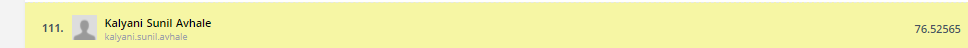

#Improve the model